**atomPairFP**

In [69]:
import pandas as pd

In [70]:
dfPub = pd.read_csv('atompair_cdk2.csv')

In [71]:
dfPub.head(2)

,Unnamed: 0,activity,AD2D1,AD2D2,AD2D3,AD2D4,AD2D5,AD2D6,AD2D7,AD2D8,...,AD2D771,AD2D772,AD2D773,AD2D774,AD2D775,AD2D776,AD2D777,AD2D778,AD2D779,AD2D780
0,0,inactive,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,active,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
dfPub1= dfPub.drop(['Unnamed: 0'], axis=1)

In [73]:
#dfPub1.head(2)
#len(dfPub1)
#dfPub1.info()
dfPub1.isnull().sum().sum()

np.int64(0)

In [74]:
import numpy as np

from sklearn.model_selection import train_test_split

In [75]:
dfPub1.head(2)

,activity,AD2D1,AD2D2,AD2D3,AD2D4,AD2D5,AD2D6,AD2D7,AD2D8,AD2D9,...,AD2D771,AD2D772,AD2D773,AD2D774,AD2D775,AD2D776,AD2D777,AD2D778,AD2D779,AD2D780
0,inactive,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,active,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
#dfPub1.head(2)
#len(dfPub1)
#dfPub1.info()
dfPub1.isnull().sum().sum()

np.int64(0)

In [77]:
import numpy as np

from sklearn.model_selection import train_test_split

**Label** **encoder**

In [78]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
label_encoder = preprocessing.LabelEncoder()

dfPub1['activity']= label_encoder.fit_transform(dfPub1['activity'])

In [79]:
X = dfPub1.drop('activity', axis=1)
X.head(3)

,AD2D1,AD2D2,AD2D3,AD2D4,AD2D5,AD2D6,AD2D7,AD2D8,AD2D9,AD2D10,...,AD2D771,AD2D772,AD2D773,AD2D774,AD2D775,AD2D776,AD2D777,AD2D778,AD2D779,AD2D780
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
y = dfPub1.activity
y.head(3)

,activity
0,1
1,0
2,0


In [81]:
y.value_counts()

,count
activity,
1,839
0,518


In [82]:
X.shape, y.shape

((1357, 780), (1357,))

Test train Split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20)

**Balancing the Imbalanced** **Data**

In [84]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [85]:
y_train.value_counts()

,count
activity,
1,752
0,752


**Preprocessing**

In [86]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [87]:
X_train.shape, y_train.shape,X_test.shape,y_test.shape

((1504, 780), (1504,), (136, 780), (136,))

**LogisticRegression**

In [88]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 100)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75        49
           1       0.88      0.82      0.85        87

    accuracy                           0.81       136
   macro avg       0.79      0.81      0.80       136
weighted avg       0.82      0.81      0.81       136



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**confusion_matrix**

In [89]:
confusion_matrix(y_test,y_pred)

array([[39, 10],
       [16, 71]])

In [90]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt


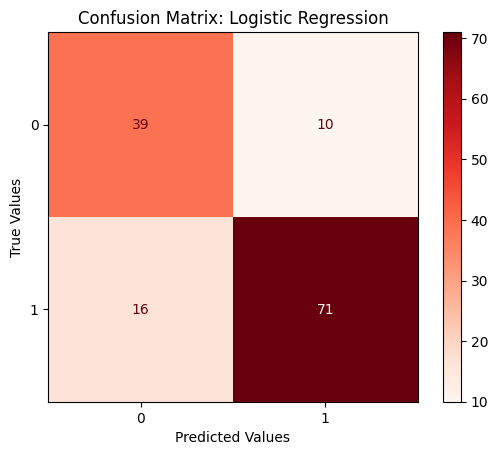

In [91]:
cm= confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Reds)
plt.title('Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()


**AUC**-**ROC**

In [92]:
rlr_probs = [0 for _ in range(len(y_test))]
rflr_probs = lr.predict_proba(X_test)

rflr_probs = rflr_probs[:, 1]

rflr_auc = roc_auc_score(y_test, rflr_probs)
print('Logistic Regression: AUC_ROC = %.3f' % (rflr_auc))


Logistic Regression: AUC_ROC = 0.896


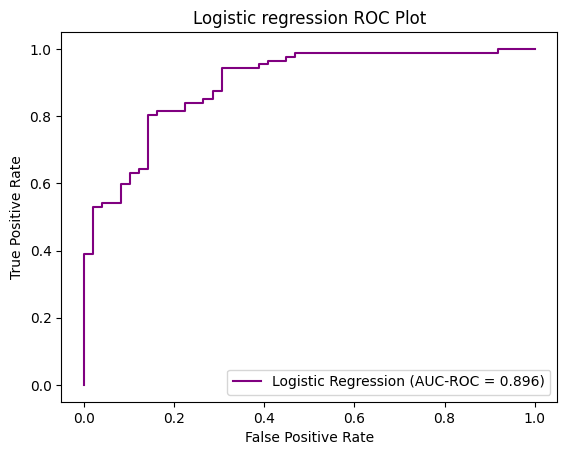

In [93]:
rflr_fpr, rflr_tpr, _ = roc_curve(y_test, rflr_probs)

plt.plot(rflr_fpr, rflr_tpr, label='Logistic Regression (AUC-ROC = %0.3f)' % rflr_auc, color='purple')
# Title
plt.title('Logistic regression ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() #

plt.savefig('Logistic Regression ROC Plot')

# Show plot
plt.show()

**KNeighborsClassifier**

In [94]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82        49
           1       0.95      0.82      0.88        87

    accuracy                           0.85       136
   macro avg       0.84      0.87      0.85       136
weighted avg       0.87      0.85      0.86       136



**confusion_matrix**

In [95]:
confusion_matrix(y_test,y_pred)

array([[45,  4],
       [16, 71]])

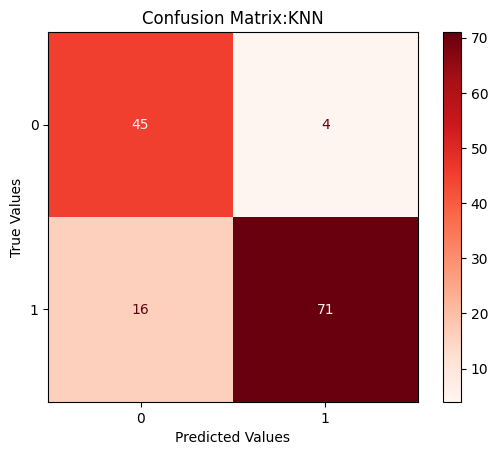

In [96]:
cm= confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Reds)
plt.title('Confusion Matrix:KNN')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

**AUC**-**ROC**

In [97]:
rknn_probs = [0 for _ in range(len(y_test))]
rfknn_probs = knn.predict_proba(X_test)

rfknn_probs = rfknn_probs[:, 1]

rfknn_auc = roc_auc_score(y_test, rfknn_probs)
print('KNN: AUC_ROC = %.3f' % (rfknn_auc))

KNN: AUC_ROC = 0.937


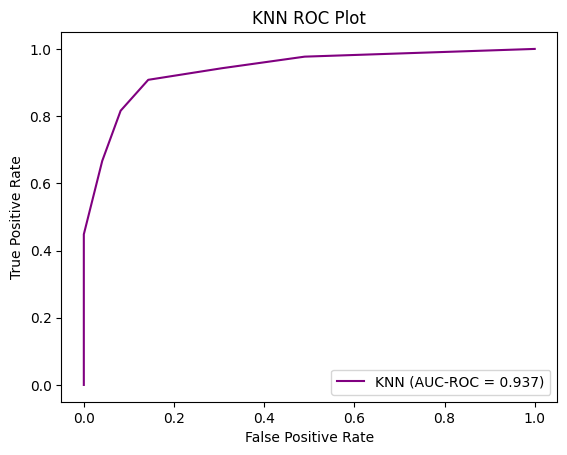

In [98]:
rfknn_fpr, rfknn_tpr,_ = roc_curve(y_test, rfknn_probs)

plt.plot(rfknn_fpr, rfknn_tpr, label='KNN (AUC-ROC = %0.3f)' % rfknn_auc, color='purple')
# Title
plt.title('KNN ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() #

plt.savefig('KNN ROC Plot')

# Show plot
plt.show()

**DecisionTree**

In [99]:
from sklearn.tree import DecisionTreeClassifier
dtr = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83        49
           1       0.95      0.84      0.89        87

    accuracy                           0.87       136
   macro avg       0.86      0.88      0.86       136
weighted avg       0.88      0.87      0.87       136



**confusion_matrix**

In [100]:
confusion_matrix(y_test,y_pred)

array([[45,  4],
       [14, 73]])

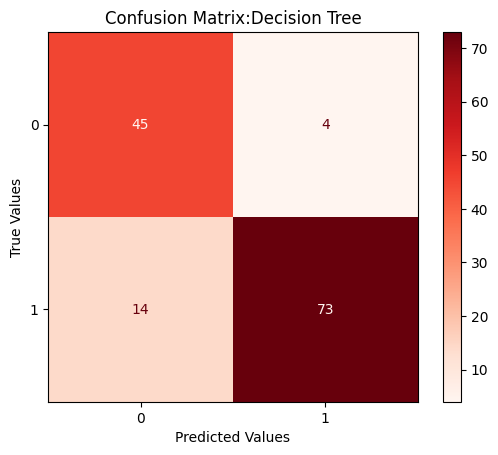

In [101]:
cm= confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Reds)
plt.title('Confusion Matrix:Decision Tree')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

**AUC**-**ROC**

In [102]:
rdt_probs = [0 for _ in range(len(y_test))]
rfdt_probs = dtr.predict_proba(X_test)

rfdt_probs = rfdt_probs[:, 1]

rfdt_auc = roc_auc_score(y_test, rfdt_probs)
print('Decision Tree: AUC_ROC = %.3f' % (rfdt_auc))

Decision Tree: AUC_ROC = 0.887


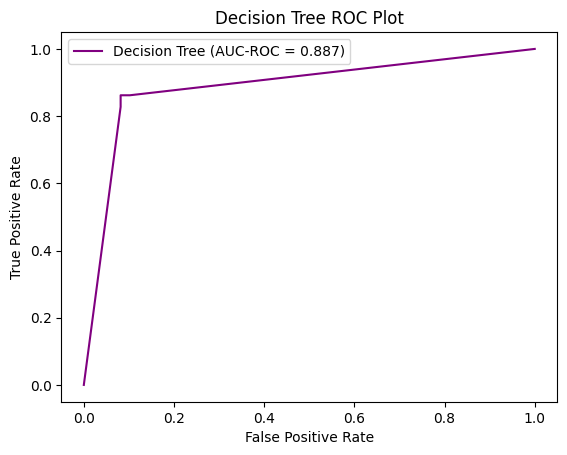

In [103]:
rfdt_fpr, rfdt_tpr, _ = roc_curve(y_test, rfdt_probs)

plt.plot(rfdt_fpr, rfdt_tpr, label='Decision Tree (AUC-ROC = %0.3f)' % rfdt_auc, color='purple')
# Title
plt.title('Decision Tree ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() #

plt.savefig('Decision Tree ROC Plot')

# Show plot
plt.show()

**RandomForestClassifier**

In [104]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        49
           1       0.92      0.90      0.91        87

    accuracy                           0.88       136
   macro avg       0.87      0.88      0.87       136
weighted avg       0.88      0.88      0.88       136



**confusion_matrix**

In [105]:
confusion_matrix(y_test,y_pred)

array([[42,  7],
       [ 9, 78]])

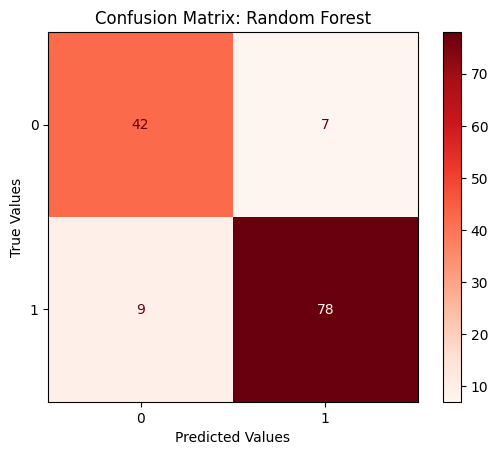

In [106]:
cm= confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Reds)
plt.title('Confusion Matrix: Random Forest')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

**AUC**-**ROC**

In [107]:
rrf_probs = [0 for _ in range(len(y_test))]
rfrf_probs = rfc.predict_proba(X_test)

rfrf_probs = rfrf_probs[:, 1]

rfrf_auc = roc_auc_score(y_test, rfrf_probs)
print('Random Forest: AUC_ROC = %.3f' % (rfrf_auc))

Random Forest: AUC_ROC = 0.960


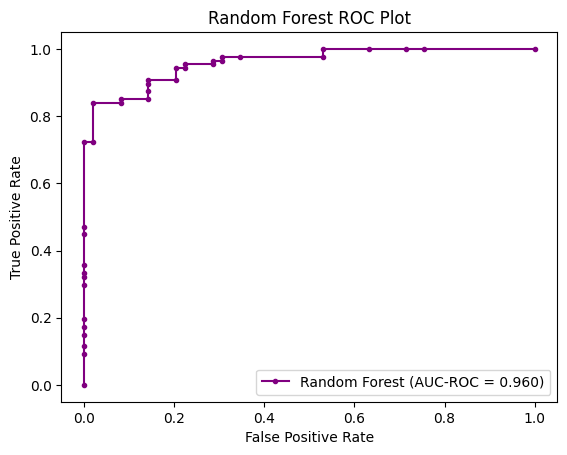

In [108]:
rfrf_fpr, rfrf_tpr, _ = roc_curve(y_test, rfrf_probs)

plt.plot(rfrf_fpr, rfrf_tpr, marker='.', label='Random Forest (AUC-ROC = %0.3f)' % rfrf_auc, color='purple')
# Title
plt.title('Random Forest ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() #

plt.savefig('Random Forest ROC Plot')

# Show plot
plt.show()

**XGboost**

In [109]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train) # creating of the model
y_pred=xgb.predict(X_test)


from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        49
           1       0.93      0.91      0.92        87

    accuracy                           0.90       136
   macro avg       0.89      0.89      0.89       136
weighted avg       0.90      0.90      0.90       136



**confusion_matrix**

In [110]:
confusion_matrix(y_test,y_pred)

array([[43,  6],
       [ 8, 79]])

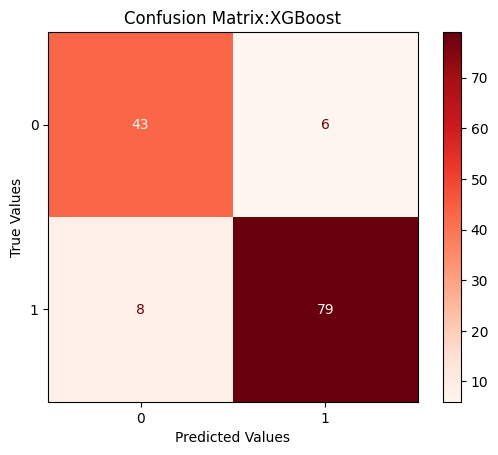

In [111]:
cm= confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Reds)
plt.title('Confusion Matrix:XGBoost')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

**AUC**-**ROC**

In [112]:
rxgb_probs = [0 for _ in range(len(y_test))]
rfxgb_probs = xgb.predict_proba(X_test)

rfxgb_probs = rfxgb_probs[:, 1]

rfxgb_auc = roc_auc_score(y_test, rfxgb_probs)
print('XGBoost: AUC_ROC = %.3f' % (rfxgb_auc))

XGBoost: AUC_ROC = 0.949


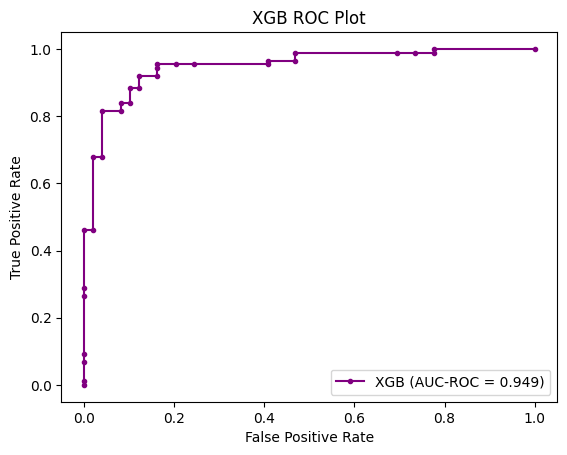

In [113]:
rfxgb_fpr, rfxgb_tpr, _ = roc_curve(y_test, rfxgb_probs)

plt.plot(rfxgb_fpr, rfxgb_tpr, marker='.', label='XGB (AUC-ROC = %0.3f)' % rfxgb_auc, color='purple')
# Title
plt.title('XGB ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() #

plt.savefig('XGBoost ROC Plot')

# Show plot
plt.show()

**NN**

In [114]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential

In [115]:
ap = Sequential()

ap.add(Dense(12, input_dim=780, activation='relu'))

ap.add(Dense(6, activation='relu'))

ap.add(Dense(1, activation='sigmoid'))

ap.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [116]:
ap.fit(X_train, y_train, epochs=100,validation_split=0.2, batch_size=50)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6242 - loss: 0.6441 - val_accuracy: 0.2890 - val_loss: 0.8804
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7035 - loss: 0.5688 - val_accuracy: 0.3787 - val_loss: 0.8723
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7258 - loss: 0.5323 - val_accuracy: 0.4252 - val_loss: 0.8761
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7622 - loss: 0.4979 - val_accuracy: 0.5150 - val_loss: 0.8241
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8004 - loss: 0.4733 - val_accuracy: 0.5847 - val_loss: 0.7780
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8033 - loss: 0.4576 - val_accuracy: 0.6146 - val_loss: 0.7628
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8196 - loss: 0.4221 - val_accuracy: 0.6246 - val_loss: 0.7789
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8113 - loss: 0.4209 - val_accuracy: 0.6811 - 

In [117]:
y_pred = ap.predict(X_test).round()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [119]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80        49
           1       0.87      0.92      0.89        87

    accuracy                           0.86       136
   macro avg       0.86      0.84      0.84       136
weighted avg       0.86      0.86      0.86       136



In [120]:

cm = confusion_matrix(y_test, y_pred)
cm


array([[37, 12],
       [ 7, 80]])

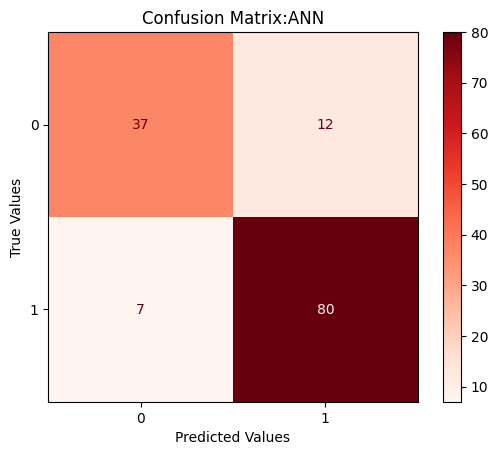

In [122]:

import matplotlib.pyplot as plt
cm= confusion_matrix(y_test,y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Reds)
plt.title('Confusion Matrix:ANN')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

**AUC-ROC**

In [123]:
rfann_auc = roc_auc_score(y_test, y_pred)
print('NN: AUC_ROC = %.3f' % (rfann_auc))

NN: AUC_ROC = 0.837


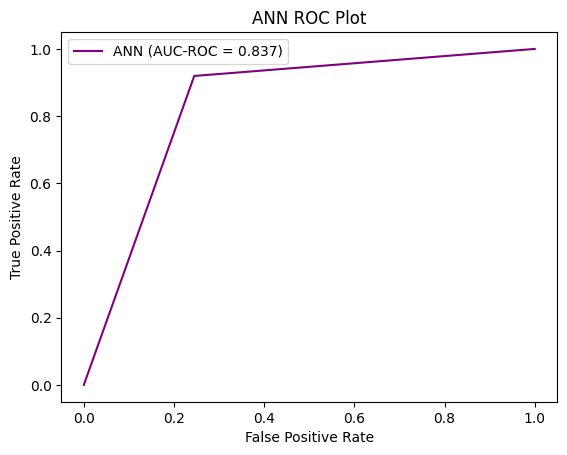

In [124]:
rfann_fpr, rfann_tpr, _ = roc_curve(y_test, y_pred)

plt.plot(rfann_fpr, rfann_tpr, label='ANN (AUC-ROC = %0.3f)' % rfann_auc, color='purple')
# Title
plt.title('ANN ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() #

plt.savefig('ANN ROC Plot')

# Show plot
plt.show()

**Random**

In [125]:
# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

**All** ***ROC plots Combined***

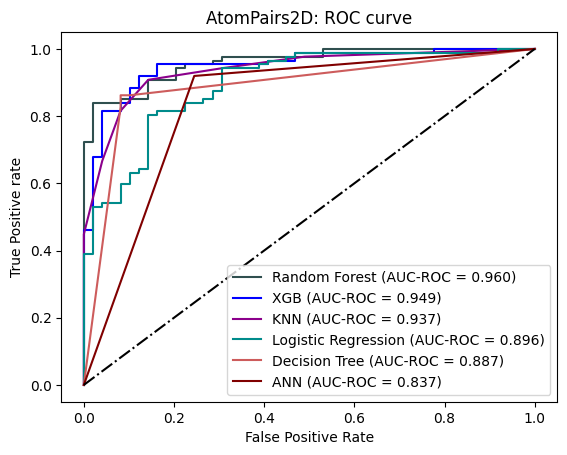

In [127]:
# plot roc curves

plt.plot(rfrf_fpr, rfrf_tpr,  label='Random Forest (AUC-ROC = %0.3f)' % rfrf_auc, color='darkslategray')
plt.plot(rfxgb_fpr, rfxgb_tpr,  label='XGB (AUC-ROC = %0.3f)' % rfxgb_auc, color='blue')
plt.plot(rfknn_fpr, rfknn_tpr, label='KNN (AUC-ROC = %0.3f)' % rfknn_auc, color='darkmagenta')
plt.plot(rflr_fpr, rflr_tpr, label='Logistic Regression (AUC-ROC = %0.3f)' % rflr_auc, color='darkcyan')
plt.plot(rfdt_fpr, rfdt_tpr, label='Decision Tree (AUC-ROC = %0.3f)' % rfdt_auc, color='indianred')
plt.plot(rfann_fpr, rfann_tpr, label='ANN (AUC-ROC = %0.3f)' % rfann_auc, color='maroon')

plt.plot(p_fpr, p_tpr, linestyle='-.', color='black')
#------------------------------------------------------------
# title
plt.title('AtomPairs2D: ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('atompairs2D: ROC curve',dpi=300)
plt.show();
